In [3]:
import numpy as np
import seaborn as sns

In [4]:
opciones =['par','impar']

if np.random.random() < 0.5:
    print(opciones[0])
else:
    print(opciones[1])

impar


In [30]:
def contar_n_muestras(nro_muestras,opciones = ['par','impar'], buscado = 'par'):
    resultado = np.random.choice(opciones,nro_muestras)
    coincidencias = resultado == buscado
    return coincidencias.sum()
    
    
def hacer_n_experimentos(nro_muestras,nro_experimentos, opciones = ['par','impar'], buscado = 'par'):
    resultado = []
    for i in range(nro_experimentos):
        experimento = contar_n_muestras(nro_muestras, opciones = opciones, buscado =buscado)
        resultado. append(experimento)
    return resultado
    

In [31]:
contar_n_muestras(4)

1

In [32]:
hacer_n_experimentos(4,10)

[4, 3, 1, 2, 3, 1, 2, 0, 2, 3]

C:\Users\TZ182CG\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

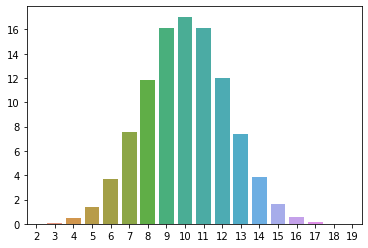

In [58]:
nro_muestras = 20
nro_experimentos = 10000
exp = hacer_n_experimentos(nro_muestras,nro_experimentos)
unique, counts = np.unique(exp, return_counts = True) ##podemos hacer esto, poner dos palabras a una funcion
sns.barplot(unique,counts/counts.sum()*100)

In [61]:
largos = [14.5, 14.5, 14.5,15,13.9,14.3,13.2,17.5,13.9,14.7,16.0,14.3,15.3,15.0,16.0,15.9,14.5,10.2,14.3,14.3,14.9,16.6,12.2,12.5]
np.mean(largos)

14.5

[14.5 14.5 14.5 15.  13.9 14.3 13.2 17.5 13.9 14.7 16.  14.3 15.3 15.
 16.  15.9 14.5 10.2 14.3 14.3 14.9 16.6 12.2 12.5]


C:\Users\TZ182CG\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

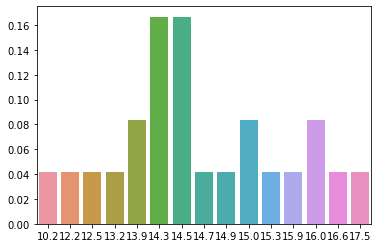

In [63]:
data = np.array(largos)
print(data)
unique,counts = np.unique(data,return_counts=True)
sns.barplot(unique,counts/counts.sum())

In [65]:
data.sort()
print(data)

[10.2 12.2 12.5 13.2 13.9 13.9 14.3 14.3 14.3 14.3 14.5 14.5 14.5 14.5
 14.7 14.9 15.  15.  15.3 15.9 16.  16.  16.6 17.5]


[10.2 12.2 12.5 13.2 13.9 13.9 14.3 14.3 14.3 14.3 14.5 14.5 14.5 14.5
 14.7 14.9 15.  15.  15.3 15.9 16.  16.  16.6 17.5]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


C:\Users\TZ182CG\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


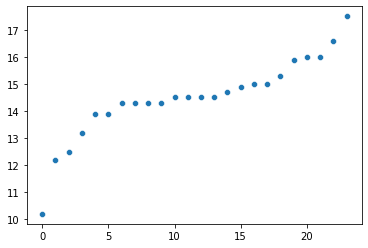

In [67]:
data.sort()
print(data)
x = np.arange(len(data))
print(x)
grafico = sns.scatterplot(x,data)

 La probabilidad de que le valor este entre 14 y 15 es 50.0%


C:\Users\TZ182CG\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


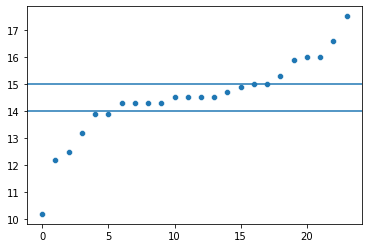

In [69]:
#Cual es pla probabilidad de que in lapiz mida entre 14 y 15 cm

cota_sup = 15
cota_inf = 14

condicion = (cota_inf < data) & (data <= cota_sup)
#la probabilidad son los casos favorables osbre los totales
print(f' La probabilidad de que le valor este entre {cota_inf} y {cota_sup} es {condicion.sum()/len(condicion)*100}%')
grafico = sns.scatterplot(x,data)
grafico.axhline(cota_sup)
grafico.axhline(cota_inf)

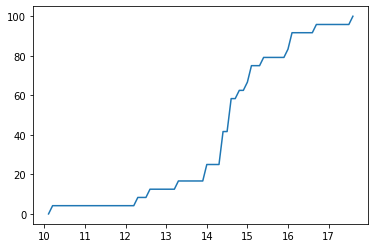

In [72]:
# Vamos a construir la probabilidad acumulada

paso = 0.1

probabilidad_acumulada =[]
limite_inf = data.min()-paso

for deslizador in np.arange(data.min()-paso,data.max()+paso,paso):
    condicion = (limite_inf < data) & (data <= deslizador)
    probabilidad_acumulada .append(condicion.sum()/len(condicion)*100)
    
grafico = sns.lineplot(no.arange(data.min()-paso, data.max()+paso,paso),probabilidad_acumulada)

C:\Users\TZ182CG\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


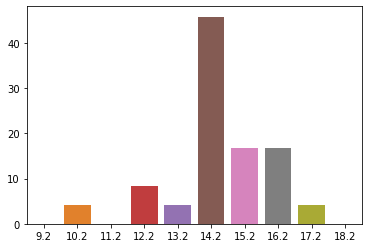

In [76]:
# Vamos a construir la densidad de probabilidad
paso=1
densidad_probabilidad =[]

for deslizador in np.arange(data.min()-paso,data.max()+paso,paso):
    condicion = (deslizador - paso/2 < data) & (data <= deslizador + paso/2)
    densidad_probabilidad.append(condicion.sum()/len(condicion)*100)

grafico = sns.barplot(np.arange(data.min()-paso,data.max()+paso,paso),densidad_probabilidad)